In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [27]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [28]:
conso_file = r"Y:\Documents\conso.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207661 entries, 0 to 207660
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  207661 non-null  int64  
 1   kWh       207661 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.2 MB


<Axes: >

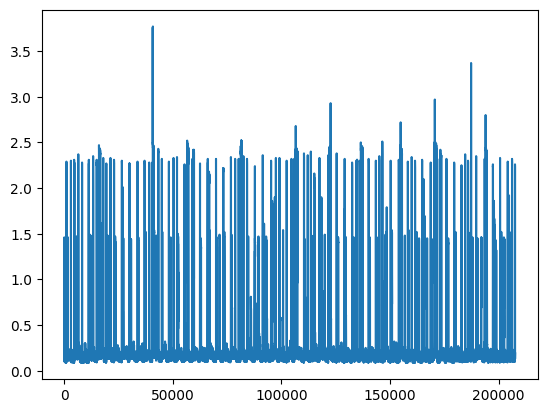

In [29]:
conso_data['kWh'].plot()

In [30]:
l=len(conso_data)-1
l

207660

In [31]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [32]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
207656,2405,1.50,2.405,1496.881497,4946670540
207657,2502,1.44,2.502,1438.848921,4946673042
207658,14631,0.25,14.631,246.052901,4946687673
207659,18364,0.20,18.364,196.035722,4946706037
207660,18448,0.19,18.448,195.143105,4946724485


In [33]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

4946724485000

In [34]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2024, 3, 7, 1, 54, 37, 125143)

In [35]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:55:03.414143,07/03/24
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:55:29.657143,07/03/24
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:55:55.542143,07/03/24
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:56:21.296143,07/03/24
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:56:47.070143,07/03/24
...,...,...,...,...,...,...,...
207656,2405,1.50,2.405,1496.881497,4946670540,2024-05-03 07:59:07.665143,03/05/24
207657,2502,1.44,2.502,1438.848921,4946673042,2024-05-03 07:59:10.167143,03/05/24
207658,14631,0.25,14.631,246.052901,4946687673,2024-05-03 07:59:24.798143,03/05/24
207659,18364,0.20,18.364,196.035722,4946706037,2024-05-03 07:59:43.162143,03/05/24


In [36]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, month, year


('03/05/24', 5, 2024)

In [37]:
here = now.strftime('%H:%M:%S')
here

'08:00:06'

In [38]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [39]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
206685,31666,0.11,31.666,113.686604,4917936009,2024-05-03 00:00:13.134143,03/05/24
206686,32760,0.11,32.760,109.890110,4917968769,2024-05-03 00:00:45.894143,03/05/24
206687,32899,0.11,32.899,109.425818,4918001668,2024-05-03 00:01:18.793143,03/05/24
206688,34642,0.10,34.642,103.920097,4918036310,2024-05-03 00:01:53.435143,03/05/24
206689,34306,0.10,34.306,104.937912,4918070616,2024-05-03 00:02:27.741143,03/05/24
...,...,...,...,...,...,...,...
207656,2405,1.50,2.405,1496.881497,4946670540,2024-05-03 07:59:07.665143,03/05/24
207657,2502,1.44,2.502,1438.848921,4946673042,2024-05-03 07:59:10.167143,03/05/24
207658,14631,0.25,14.631,246.052901,4946687673,2024-05-03 07:59:24.798143,03/05/24
207659,18364,0.20,18.364,196.035722,4946706037,2024-05-03 07:59:43.162143,03/05/24


In [40]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [41]:
data = list(df_grp['kWh'])
print(data)


[3.125, 3.751, 3.081, 3.533, 4.539, 3.561, 3.542, 3.651, 3.563, 3.358, 3.351, 4.403, 3.507, 3.441, 3.551, 3.741, 3.531, 3.336, 3.892, 3.418, 3.471, 3.637, 3.76, 3.656, 3.83, 3.836, 3.818, 3.42, 3.475, 4.42, 3.397, 4.077, 3.779, 4.06, 3.433, 3.575, 3.442, 4.121, 3.272, 3.318, 3.703, 3.689, 4.222, 3.281, 3.382, 3.764, 4.087, 3.505, 3.3, 3.29, 3.062, 3.756, 3.812, 3.783, 3.409, 3.45, 3.518, 0.976]


In [42]:

import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [43]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.3227
dtype: float64

In [44]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.580362
dtype: float64

In [45]:
last=df_grp.iloc[-1]['kWh']

In [46]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:13,31666,0.11,31.666,113.686604,4917936009,2024-05-03 00:00:13.134143,03/05/24
0:0:45,32760,0.11,32.760,109.890110,4917968769,2024-05-03 00:00:45.894143,03/05/24
0:1:18,32899,0.11,32.899,109.425818,4918001668,2024-05-03 00:01:18.793143,03/05/24
0:1:53,34642,0.10,34.642,103.920097,4918036310,2024-05-03 00:01:53.435143,03/05/24
0:2:27,34306,0.10,34.306,104.937912,4918070616,2024-05-03 00:02:27.741143,03/05/24
...,...,...,...,...,...,...,...
7:59:7,2405,1.50,2.405,1496.881497,4946670540,2024-05-03 07:59:07.665143,03/05/24
7:59:10,2502,1.44,2.502,1438.848921,4946673042,2024-05-03 07:59:10.167143,03/05/24
7:59:24,14631,0.25,14.631,246.052901,4946687673,2024-05-03 07:59:24.798143,03/05/24


In [47]:
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('08:00:06', 0.976, 976)

In [48]:
df_grp.tail(7)

,kWh
days,
27/04/24,3.756
28/04/24,3.812
29/04/24,3.783
30/04/24,3.409
01/05/24,3.450
02/05/24,3.518
03/05/24,0.976


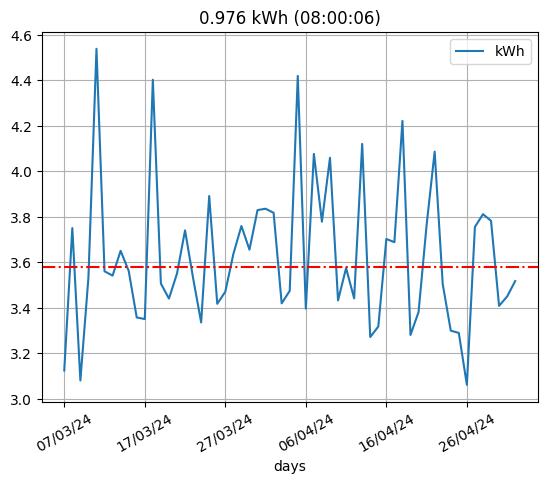

In [49]:
# plot the day consos in the group
df_grp.iloc[:-1].plot(grid=True)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


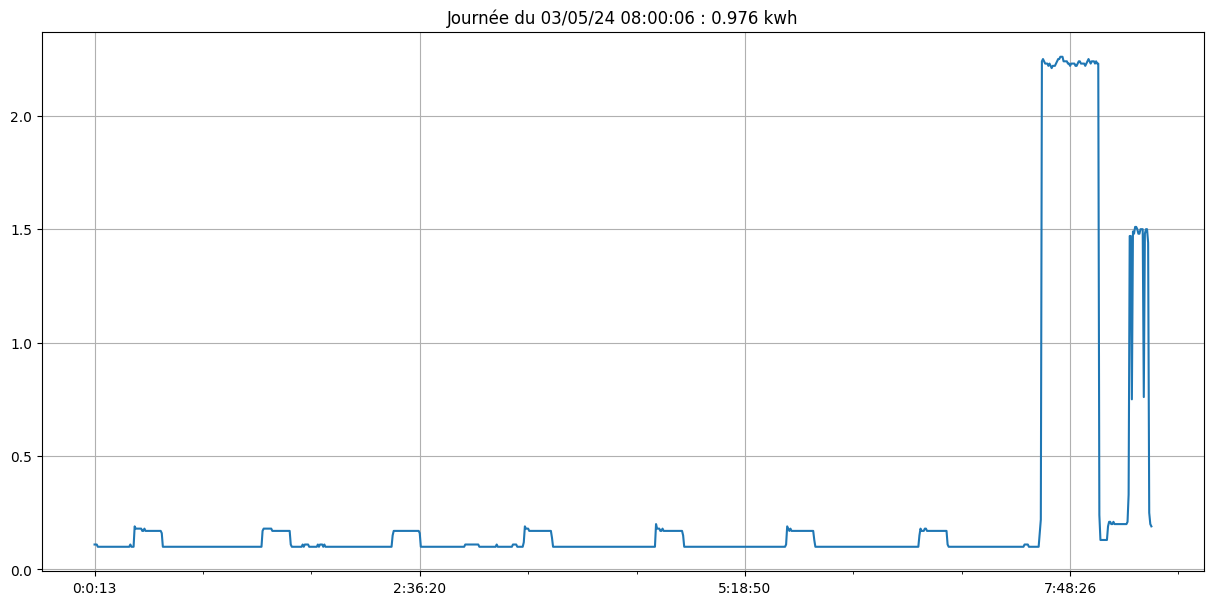

In [50]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()